# K-Means Clustering
In this experiment, we use the K-Means Clustering algorithm to cluster varieties of the Iris dataset.

In [52]:
# Import necessary libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In order to access the dataset, you may download it from the following [link](https://gist.github.com/netj/8836201) or load it from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

In [53]:
df = pd.read_csv('Datasets/iris.csv')
display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


For this experiment, we will assign Setosa to class $0$, Versicolor to class $1$, and Virginica to class $2$.

In [54]:
df.loc[df['variety'] == 'Setosa', 'variety'] = 0
df.loc[df['variety'] == 'Versicolor', 'variety'] = 1
df.loc[df['variety'] == 'Virginica', 'variety'] = 2
display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


For this experiment, we will only use petal length ($x_0$) and petal width ($x_1$) as our features. Although we will not need it in our algorithm, the variety class ($y$) is also extracted in order to verify the clusters later on.

In [55]:
x0 = torch.tensor(df.iloc[:,2].values, dtype=torch.float32)
x1 = torch.tensor(df.iloc[:,3].values, dtype=torch.float32)
y = torch.tensor(df.iloc[:,4].values.astype(np.float32), dtype=torch.float32)

We now construct our K-Means Clustering model class. We used the following references [[1](https://www.youtube.com/watch?v=4b5d3muPQmA), [2](https://www.youtube.com/watch?v=KzJORp8bgqs)] in determining the formulas needed. The function $ed$ computes for the Euclidean distance between the centroids and the samples, $cluster$ assigns each sample to a cluster, and $update$ computes for the new centroid values. For this model, we set the default $k$ to $3$ clusters to match the varieties of the Iris dataset. Moreover, we set the number of maximum iterations (or number of maximum updates) to 10, but the model stops updating if the previous centroid is the same as the newly computed centroid.

In [56]:
class KMeansClustering():
    def __init__(self, x0, x1, k=3, num_iter=10):
        self.x0 = x0
        self.x1 = x1
        self.xsize = list(self.x0.shape)[0]
        self.y = torch.ones(self.xsize) * 3 # Dummy y tensor set to 3 so that it will not overlap with other clusters
        self.k = k
        self.cidx = torch.randperm(self.xsize)[:self.k]
        self.c0 = torch.tensor([x0[i] for i in self.cidx])
        self.c1 = torch.tensor([x1[i] for i in self.cidx])
        self.clusters = [[] for _ in range(self.k)]
        self.num_iter = num_iter

    def ed(self, i):
        return torch.sqrt(torch.pow(self.c0 - self.x0[i], 2) + torch.pow(self.c1 - self.x1[i], 2))

    def cluster(self):
        self.clusters = [[] for _ in range(self.k)]
        for i in range(self.xsize):
            dist = self.ed(i)
            c = torch.argmin(dist).item()
            self.y[i] = c
            self.clusters[c].append(i)
    
    def update(self):
        for i, c in enumerate(self.clusters):
            self.c0[i] = torch.mean(self.x0[torch.tensor(c)])
            self.c1[i] = torch.mean(self.x1[torch.tensor(c)])

    def fit(self):
        for itr in range(self.num_iter):
            print(f'Iter {itr}:')
            self.cluster()
            old_centroids = [(torch.clone(self.c0[i]), torch.clone(self.c1[i])) for i in range(self.k)]
            self.update()
            print(f'New Centroids: {self._centroids()}')
            if self._centroids() == old_centroids:
                break

    def _centroids(self):
        return [(self.c0[i], self.c1[i]) for i in range(self.k)]

    def _y(self):
        return self.y
    
    def _clusters(self):
        return self.clusters

Let us now perform the clustering. The new centroids are printed after each iteration. We observe that the centroids converged and the final clusters were determined in around 5 iterations.

In [59]:
if __name__ == "__main__":
    km = KMeansClustering(x0,x1)
    km.fit()
    class_idx = km._clusters()

Iter 0:
New Centroids: [(tensor(1.4620), tensor(0.2460)), (tensor(5.5148), tensor(1.9944)), (tensor(4.1913), tensor(1.3022))]
Iter 1:
New Centroids: [(tensor(1.4620), tensor(0.2460)), (tensor(5.5385), tensor(2.0135)), (tensor(4.2208), tensor(1.3104))]
Iter 2:
New Centroids: [(tensor(1.4620), tensor(0.2460)), (tensor(5.5837), tensor(2.0265)), (tensor(4.2549), tensor(1.3392))]
Iter 3:
New Centroids: [(tensor(1.4620), tensor(0.2460)), (tensor(5.5958), tensor(2.0375)), (tensor(4.2692), tensor(1.3423))]
Iter 4:
New Centroids: [(tensor(1.4620), tensor(0.2460)), (tensor(5.5958), tensor(2.0375)), (tensor(4.2692), tensor(1.3423))]


To verify the performance of our K-Means Clustering model, we plot both the predicted clusters and the actual clusters. We see that although similar clusters were observed, the class numbering is not the same. This is expected since the algorithm is unsupervised, thus it does not classify the data into specific varieties but rather groups them into unlabeled clusters.

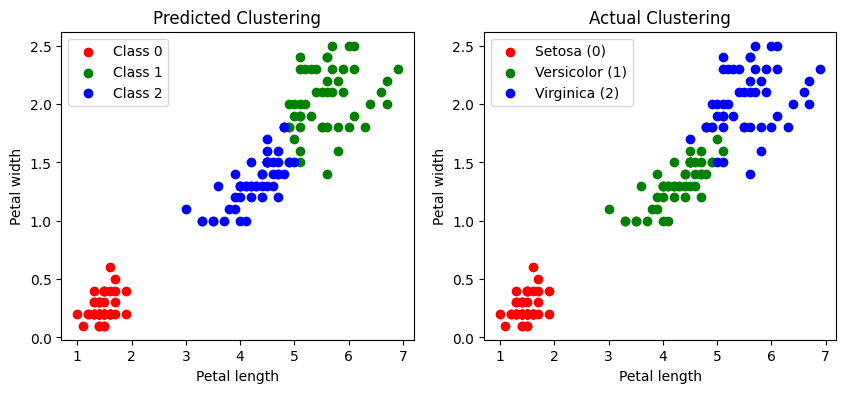

In [62]:
fig = plt.figure(figsize=(10, 4))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.scatter(x0[class_idx[0]],x1[class_idx[0]], label='Class 0', color='red')
plt.scatter(x0[class_idx[1]],x1[class_idx[1]], label='Class 1', color='green')
plt.scatter(x0[class_idx[2]],x1[class_idx[2]], label='Class 2', color='blue')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.title('Predicted Clustering')

fig.add_subplot(rows, columns, 2)
plt.scatter(x0[:50],x1[:50], label='Setosa (0)', color='red')
plt.scatter(x0[50:100],x1[50:100], label='Versicolor (1)', color='green')
plt.scatter(x0[100:],x1[100:], label='Virginica (2)', color='blue')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.title('Actual Clustering')

plt.show()

To look at which data samples were clustered incorrectly by the model, let us look at the predicted classes for each index. We observe that the model correctly clusters all samples of the Setosa class, which we expect since these data points are noticeably farther from the other two classes. However, we observe that the model is sometimes confused between the Versicolor and Virginica classes since their clusters are much closer to each other. Specifically, the model incorrectly clustered the Virginica samples indexed at $106$, $119$, $126$, and $138$ to the Versicolor class, while the Versicolor samples at $77$ and $83$ were clustered to the Virginica class. Thus, we see that the model incorrectly clustered $6$ total data samples, obtaining a $96\%$ accuracy.

In [64]:
print(f'Predicted Class 0 (Actual: 0-49):\n{class_idx[0]} | No. of Samples: {len(class_idx[0])}')
print(f'Predicted Class 1 (Actual: 50-99):\n{class_idx[2]} | No. of Samples: {len(class_idx[2])}')
print(f'Predicted Class 2 (Actual: 100-149):\n{class_idx[1]} | No. of Samples: {len(class_idx[1])}')

Predicted Class 0 (Actual: 0-49):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] | No. of Samples: 50
Predicted Class 1 (Actual: 50-99):
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119, 126, 138] | No. of Samples: 52
Predicted Class 2 (Actual: 100-149):
[77, 83, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149] | No. of Samples: 48
